## 정규 방정식
- 정규 방정식 공식을 테스트하기 위한 선형 데이터 작성

In [1]:
import numpy as np

np.random.seed(42)
m=100
X=2*np.random.rand(m,1)
y=4+3*X+np.random.randn(m,1)

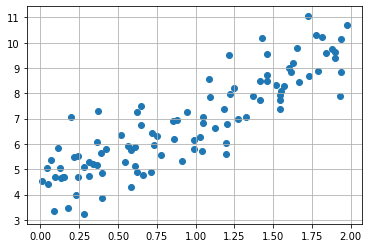

In [6]:
import matplotlib.pyplot as plt

plt.scatter(X,y)
plt.grid()
plt.show()

In [7]:
#정규 방정식을 사용해 가장 좋은 theta 값 계산하기
from sklearn.preprocessing import add_dummy_feature

X_b=add_dummy_feature(X)
#@ 연산자는 행렬 곱셈을 수행(np.matmul(A,B)와 동일한 연산)
theta_best=np.linalg.inv(X_b.T @ X_b) @X_b.T @y

In [8]:
theta_best

array([[4.21509616],
       [2.77011339]])

In [9]:
#위에서 구한 가장 좋은 theta 값을 이용해 예측 생성
X_new=np.array([[0],[2]])
X_new_b=add_dummy_feature(X_new)
y_predict=X_new_b@theta_best
y_predict

array([[4.21509616],
       [9.75532293]])

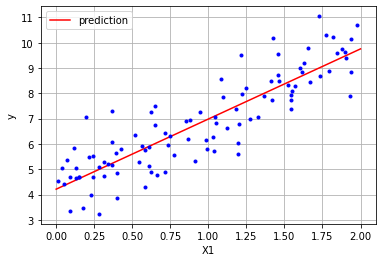

In [11]:
#모델의 예측 그래프 그리기
plt.plot(X_new, y_predict, "r-", label="prediction")
plt.plot(X,y,"b.")
plt.grid()
plt.xlabel("X1")
plt.ylabel("y")
plt.legend()
plt.show()

In [14]:
#사이킷런에서 선형 회귀를 수행
from sklearn.linear_model import LinearRegression
lin_reg=LinearRegression()
lin_reg.fit(X,y)

LinearRegression()

In [15]:
lin_reg.intercept_,lin_reg.coef_

(array([4.21509616]), array([[2.77011339]]))

In [16]:
lin_reg.predict(X_new)

array([[4.21509616],
       [9.75532293]])

In [17]:
#LinearRegression 클래스가 기반으로 하는 scipy.linalg.lstsq() 함수 직접 호출
theta_best_svd, residuals, rank, s=np.linalg.lstsq(X_b,y,rcond=1e-6)
theta_best_svd

array([[4.21509616],
       [2.77011339]])

In [18]:
#유사역행렬 직접 구해보기
np.linalg.pinv(X_b)@y

array([[4.21509616],
       [2.77011339]])

## 경사하강법

In [21]:
#내려가는 스텝의 크기를 결정하는 방법

eta=0.1 #학습률
n_epochs=1000
m=len(X_b) #샘플 수 

np.random.seed(42)
theta=np.random.randn(2,1) #모델 파리미터 랜덤 초기화

#훈련 세트를 한 번 반복하는 것을 epoch라고 함
for epoch in range(n_epochs):
    gradients=2/m*X_b.T@(X_b@theta-y)
    theta=theta-eta*gradients

In [22]:
theta

array([[4.21509616],
       [2.77011339]])